<a href="https://colab.research.google.com/github/hashaski/Bingo-Lite/blob/main/Hackathon_Teros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hackathon Teros
participantes: <br>
  Alex Se Yoon Koo 32129319 <br>
  André TIA 32273541 <br>
  Diogo TIA <br>
  Nicolas Carmona Rondon

## Análise de Dados

Importamos os arquivos e as bibliotecas necessárias tanto para a crição de base de dados e para o motor analítico.

In [ ]:
#recebe arquivo para análise
#arquivo = input('Digite o url do seu arquivo csv: ')
#url_teste = arquivo

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/hashaski/Hackathon-Teros/test/dados_treino_hackaton.csv'
url_teste = 'https://raw.githubusercontent.com/hashaski/Hackathon-Teros/test/dados_teste_x_hackaton.csv'

df = pd.read_csv(url, encoding = "ISO-8859-1")
df_teste = pd.read_csv(url_teste, encoding = "ISO-8859-1")

df

,Unnamed: 0,Codigo_da_oportunidade,Classificacao_da_Oportunidade,Data_de_criacao,Faixa_de_Faturamento_Agregado,Data_Real_de_Encerramento_da_Opp2,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,...,Transformação Digital,Treinamentos,Roadmap,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total,ID_cliente
0,1,10054,Novo,2019-10-11,"De 60,1 a 300 milhoes",2019-10-29,1,1,0,0.00,...,0,0,0,2,Serviços,Telecomunicacoes e Midia,115.0,151368.42,0.567519,826
1,2,10004,Recuperação,2019-10-09,De 501 a 1 bilhão,2019-10-31,1,2,1,2.03,...,0,0,0,0,Bens Duráveis,Demais Ind.,205.0,183543.74,0.573154,225
2,3,10063,Renovação,2019-10-16,Acima de 5 bilhões,2019-11-04,0,8,5,6.27,...,0,0,0,1,Serviços,Serviços Financeiros,472.0,725715.00,0.615311,849
3,4,10138,Novo,2019-10-29,"De 60,1 a 300 milhoes",2019-11-06,1,1,0,0.00,...,0,0,0,0,Bens Não Duráveis,Ind de Alimentos e Bebidas,4.0,24540.16,0.233120,282
4,5,10074,Renovação,2019-10-16,Acima de 5 bilhões,2019-11-13,1,6,5,4.37,...,0,0,0,0,Internacional & Outros,Siderurgia e Mineração,691.0,1639159.66,0.545262,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,12013,Recuperação,2021-01-27,De 501 a 1 bilhão,2021-05-21,0,3,0,19.43,...,0,0,0,0,Infraestrutura e Indústria de Base,Siderurgia e Mineração,302.0,380656.50,0.470575,229
609,610,12191,Recuperação,2021-03-01,Acima de 5 bilhões,2021-05-21,0,2,0,38.53,...,0,0,0,3,Serviços,Servicos Especializados,62.0,103393.16,0.469779,777
610,611,12202,Renovação,2021-03-03,"De 60,1 a 300 milhoes",2021-05-24,0,2,1,27.67,...,0,0,0,3,Serviços,Outros,91.0,113290.31,0.475328,848
611,612,11621,Novo,2020-10-09,De 1 a 5 bilhões,2021-05-25,0,1,0,0.00,...,0,0,0,0,Bens Não Duráveis,Comércio de Alimentos e Bebidas,384.0,543069.12,0.579808,729


Tiramos as colunas desnecessárias ou irrelevantes na hora da predição

In [ ]:
#tiramos as colunas que achamos desnecessarias ou irrelevantes na hora da predição
df.drop(['Unnamed: 0','Data_de_criacao','Data_Real_de_Encerramento_da_Opp2','intervalo_tempo','ID_cliente','ano','Codigo_da_oportunidade','n_solucoes'], axis=1, inplace = True)
df_teste.drop(['Unnamed: 0','Data_de_criacao','Data_Real_de_Encerramento_da_Opp2','intervalo_tempo','ID_cliente','ano','Codigo_da_oportunidade','n_solucoes'], axis=1, inplace = True)

Tiramos os espaços em branco na coluna por um underline.

In [ ]:
#tiramos os espaços em branco na coluna por um underline
df.replace(' ', '_', regex = True, inplace = True)
df_teste.replace(' ', '_', regex = True, inplace = True)

Criamos uma variável com o data frame da base dados de treino com a coluna 'id_fechou', além de criar uma outra variável com o data frame da base de dados de teste, o qual não apresenta o column target (id_fechou).

In [ ]:
X = df.drop('id_fechou', axis = 1).copy() #copiamos a tabela sem o id_fechou
X2 = df_teste.copy()

A coluna id_fechou é guardada na variável y.

In [ ]:
y = df['id_fechou'].copy() #copiamos a coluna id_fechou

Vejamos os tipos de dados de cada coluna dentro do data frame do X:

In [ ]:
X.dtypes #apresenta os tipo de dados de cada coluna

Classificacao_da_Oportunidade          object
Faixa_de_Faturamento_Agregado          object
numero_relacionamentos                  int64
numero_relacionamentos_convertidos      int64
Valor_corrigido2                      float64
Forma_de_Contratacao_Agregado          object
Concorrentes                            int64
Software                                int64
Comissão sobre Parceiros                int64
Cybersecurity                           int64
Desdobramento de metas                  int64
ESG                                     int64
Equilíbrio fiscal                       int64
Skill_dev                               int64
Gestão Estratégica                      int64
Gestão da Educação                      int64
Gestão da Operação                      int64
Gestão da Receita                       int64
Gestão da Saúde                         int64
Gestão da Segurança Pública             int64
Gestão da Segurança Viária              int64
Gestão de Gastos                  

Como podemos observar, certas colunas apresenta object como tipo de dado, o qual não é permitido uma vez que quando lidamos com o algoritmo de xgboost, ele trabalha apenas com dados numéricos. Para resolver esse problema usamos a técnica de One Hot Encoding, onde passamos a coluna do tipo object type para binária: criamos várias colunas e se a linha apresentar um certo valor é posicionada 1 na célula.

In [ ]:
X_encoded = pd.get_dummies(X, columns = ['Classificacao_da_Oportunidade',
                                         'Faixa_de_Faturamento_Agregado',
                                         'Forma_de_Contratacao_Agregado',
                                         'Carteira_Nova',
                                         'Segmento_Agregado2'])
X_encoded_teste = pd.get_dummies(X2, columns = ['Classificacao_da_Oportunidade',
                                         'Faixa_de_Faturamento_Agregado',
                                         'Forma_de_Contratacao_Agregado',
                                         'Carteira_Nova',
                                         'Segmento_Agregado2'])
#transformamos as colunas do tipo object em dados numericos, pois o algoritmo de xgboost trabalha apenas com numeros 
X_encoded

,numero_relacionamentos,numero_relacionamentos_convertidos,Valor_corrigido2,Concorrentes,Software,Comissão sobre Parceiros,Cybersecurity,Desdobramento de metas,ESG,Equilíbrio fiscal,...,Segmento_Agregado2_Petróleo_e_Gás,Segmento_Agregado2_Químico_Petroquímico_e_Embalagens,Segmento_Agregado2_Saneamento_e_Infra,Segmento_Agregado2_Servicos_Especializados,Segmento_Agregado2_Serviços_Financeiros,Segmento_Agregado2_Serviços_Médicos,Segmento_Agregado2_Siderurgia_e_Mineração,Segmento_Agregado2_Tecnologia,Segmento_Agregado2_Telecomunicacoes_e_Midia,Segmento_Agregado2_Transporte_e_Logística
0,1,0,5.035363e+05,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,6.186303e+05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,5,2.700289e+06,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,4.580399e+04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,5,4.424331e+06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3,0,9.431257e+05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
609,2,0,2.557851e+05,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
610,2,1,2.832343e+05,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
611,1,0,1.695306e+06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning (motor analítico)


<h3> Descobrimos primeiro a probabilidade de ocorrência em cada parte dividida do data frame de treino.

In [ ]:
sum(y)/len(y) #clientes que fecharam o contrato/total clientes

0.46818923327895595

Dividimos o data frame treino para duas partes: uma parte para treinar e outra parte para testar (aqui não consideramos o data frame teste! Apenas o data frame do treino!)

In [ ]:
#nesse caso ele está fazendo um cross-validation uma das tecnicas de validação: treinamos o modelo com uma parte do data set e outra parte usamos para testar
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 1, stratify = y) #criamos base de dados (tanto no treino e no teste)


Assim podemos perceber que cada parte apresenta uma probabilidade similar da probabilidade mencionada anteriormente, levando como consequencia a não ocorrencia de algum problema para o motor analitico.

In [ ]:
sum(y_train)/len(y_train) #Base de dados de treino

0.4684095860566449

In [ ]:
sum(y_test)/len(y_test) #Base de daods de teste

0.4675324675324675

Nesta seção, primeiramente criamos um modelo de acordo com as características necessárias: definimos qual algoritmo iremos usar que no caso é XGBClassifier e o objetivo dela que é binary:logistic.

A seguir, o modelo é acionado pela função fit, o qual cria um modelo inicial, o segundo modelo por sua vez foca em prever de
forma precisa nos casos onde o primeiro modelo apresenta um desempenho ruim. Repetimos o processo, sendo cada modelo sucessivo corrigindo os erros dos modelos previos.

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic', missing = None, seed = 42) #usamos binary:logistic, pois lidamos com probabilidade no resutado
model.fit(X_train, #momento que treinamos o modelo 
            y_train, 
            verbose = True,
            early_stopping_rounds = 10, #quantas iterações sem melhoria no modelo (para evitar overfitting)
            eval_metric = 'auc', #qual o tipo de métrica vamos usar
            eval_set = [(X_test, y_test)]) #enquanto a gente treina o modelo, validamos com o validation dataset

[0]	validation_0-auc:0.665735
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.703421
[2]	validation_0-auc:0.727049
[3]	validation_0-auc:0.730014
[4]	validation_0-auc:0.726118
[5]	validation_0-auc:0.732469
[6]	validation_0-auc:0.735434
[7]	validation_0-auc:0.755251
[8]	validation_0-auc:0.761433
[9]	validation_0-auc:0.767022
[10]	validation_0-auc:0.767022
[11]	validation_0-auc:0.775068
[12]	validation_0-auc:0.77854
[13]	validation_0-auc:0.773967
[14]	validation_0-auc:0.784553
[15]	validation_0-auc:0.785484
[16]	validation_0-auc:0.789804
[17]	validation_0-auc:0.788364
[18]	validation_0-auc:0.785823
[19]	validation_0-auc:0.780403
[20]	validation_0-auc:0.782774
[21]	validation_0-auc:0.780742
[22]	validation_0-auc:0.77727
[23]	validation_0-auc:0.779472
[24]	validation_0-auc:0.780488
[25]	validation_0-auc:0.780318
[26]	validation_0-auc:0.784214
Stopping. Best iteration:
[16]	validation_0-auc:0.789804



XGBClassifier(seed=42)

Nesta seção apresenta o número de acertos e os números de erros dentro dos dados. Podemos observar que dentro dos totais de acertos (negócios fechados) a inteligência artificial conseguiu acertar 64, enquanto que nos totais de erros (negócios não fechados) a ia acertou apenas 42.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


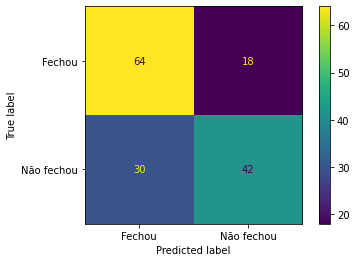

In [ ]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ["Fechou", "Não fechou"]) # 

Com a inteligência artificial treinada, iremos testar ela com o X_encoded_teste, cujo apresenta ser o data frame da base de dados de teste (sem o target column). 

In [ ]:
# fazemos as previsões
yhat = model.predict(X_encoded_teste)
print(yhat) #Previsões onde o 1 é contrato fechado e 0 não fechou

[1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]


Porém, apesar do algoritmo apresentar uma boa eficiência, há maneiras de otimizar ela. E é o que acontece na seção seguinte: adicionamos certos parâmetros a mais na hora de criar um modelo. E depois fazemos o mesmo que o anterior: treinamos a partir do fit.

In [ ]:
model = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.5,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.6,
                            colsample_bytree = 0.5)

model.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'auc',
            eval_set = [(X_test, y_test)])

[0]	validation_0-auc:0.612551
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.664211
[2]	validation_0-auc:0.695884
[3]	validation_0-auc:0.70918
[4]	validation_0-auc:0.711721
[5]	validation_0-auc:0.716125
[6]	validation_0-auc:0.715447
[7]	validation_0-auc:0.724848
[8]	validation_0-auc:0.729082
[9]	validation_0-auc:0.72561
[10]	validation_0-auc:0.727896
[11]	validation_0-auc:0.734163
[12]	validation_0-auc:0.743225
[13]	validation_0-auc:0.744411
[14]	validation_0-auc:0.743902
[15]	validation_0-auc:0.751609
[16]	validation_0-auc:0.749577
[17]	validation_0-auc:0.76211
[18]	validation_0-auc:0.760586
[19]	validation_0-auc:0.759654
[20]	validation_0-auc:0.761348
[21]	validation_0-auc:0.760163
[22]	validation_0-auc:0.75813
[23]	validation_0-auc:0.755928
[24]	validation_0-auc:0.753388
[25]	validation_0-auc:0.754404
[26]	validation_0-auc:0.754912
[27]	validation_0-auc:0.762534
[28]	validation_0-auc:0.762873
[29]	validation_0-auc:0.765752
[30]	validation_0-au

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.5, max_depth=4,
              reg_lambda=10, scale_pos_weight=3, seed=42, subsample=0.6)

Com a inteligência artifical treinada apresentamos o seus acertos e erros em um gráfico.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


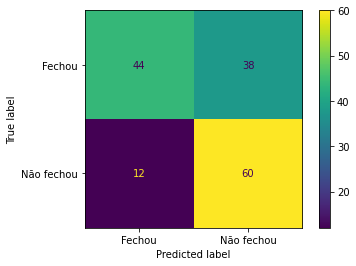

In [ ]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ["Fechou", "Não fechou"])

E criamos uma lista de binário com 1 represetando como negócio fechado e 0 como negócio não fechado, ou seja, criamos um target column.

In [ ]:
# fazemos as previsões
yhat = model.predict(X_encoded_teste)
print(yhat)

[1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1]


A seguir mostramos a árvore de decisão, da maneira que o algoritmo funciona, e 5 maps onde a sua chave apresenta ser um input do data frame (coluna) e o sua respectiva importância.

weight:  {'Segmentacao': 2, 'numero_relacionamentos': 1, 'Margem_Total': 3, 'Custo_Total': 3, 'Segmento_Agregado2_Serviços_Financeiros': 1, 'Segmento_Agregado2_Energia': 1, 'Classificacao_da_Oportunidade_Recuperação': 1, 'numero_relacionamentos_convertidos': 1}
gain:  {'Segmentacao': 20.92046451, 'numero_relacionamentos': 12.2902832, 'Margem_Total': 9.3792475, 'Custo_Total': 3.816169576666667, 'Segmento_Agregado2_Serviços_Financeiros': 6.68560791, 'Segmento_Agregado2_Energia': 6.2305603, 'Classificacao_da_Oportunidade_Recuperação': 8.33839607, 'numero_relacionamentos_convertidos': 3.5135603}
cover:  {'Segmentacao': 124.375, 'numero_relacionamentos': 119.5, 'Margem_Total': 33.916666666666664, 'Custo_Total': 10.0, 'Segmento_Agregado2_Serviços_Financeiros': 107.25, 'Segmento_Agregado2_Energia': 104.0, 'Classificacao_da_Oportunidade_Recuperação': 61.25, 'numero_relacionamentos_convertidos': 15.25}
total_gain:  {'Segmentacao': 41.84092902, 'numero_relacionamentos': 12.2902832, 'Margem_Total

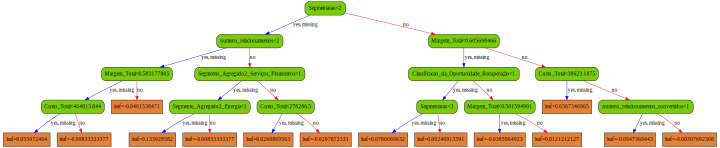

In [ ]:
model = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5,
                            n_estimators = 1)

model.fit(X_train, y_train)

bst = model.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
  print('%s: '% importance_type, bst.get_score(importance_type = importance_type))

node_params = {'shape' : 'box', 'style' : 'filled, rounded', 'fillcolor' : '#78cbe'}

leaf_params = {'shape' : 'box', 'style' : 'filled', 'fillcolor' : '#e48038'}

xgb.to_graphviz(model, num_trees = 0, size = "10,10",
                 condition_node_params = node_params,
                 leaf_node_params = leaf_params)

Nesta seção, realizamos as previsões e a coluna gerada (lista binária) é adicionada no arquivo e geramos um csv como saída.

In [ ]:
# fazemos as previsões
previsoes = model.predict(X_encoded_teste)
print(previsoes)

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [ ]:
#Atualizamos o dataframe com o resultado e geramos um csv de saída

resultado = pd.read_csv(url_teste, encoding = "ISO-8859-1")
resultado.insert((resultado.shape[1]),'Fechou',previsoes)
resultado.drop(resultado.columns.difference(['ID_cliente','Fechou']), 1, inplace=True)
resultado.to_csv('resultado.csv', index = False)

resultado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,ID_cliente,Fechou
0,95,1
1,263,0
2,437,1
3,252,1
4,386,1
...,...,...
200,737,1
201,730,1
202,738,1
203,514,1
